# Analysis of air disasters from 1919 to 2023


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

accidents = pd.read_csv("https://proai-datasets.s3.eu-west-3.amazonaws.com/aviation-accidents.csv", sep = ',', encoding='utf-8')

accidents.info()
accidents.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


,date,type,registration,operator,fatalities,location,country,cat,year
count,23967,23967,22419,23963,20029,23019,23967,23967,23967
unique,15079,3201,21962,6017,369,14608,232,11,106
top,10-MAY-1940,Douglas C-47A (DC-3),LZ-...,USAAF,0,unknown,USA,A1,1944
freq,171,1916,13,2604,10713,272,4377,17424,1505


### Cleaning the data and correcting any errors within the dataset

In [28]:
def clean_data(accidents):

    accidents['operator'] = accidents['operator'].apply(lambda x: str(x).encode('latin1', 'ignore').decode('utf-8', 'ignore'))
    accidents['location'] = accidents['location'].str.strip(" ,.?")

    return accidents

In [29]:
accidents.loc[accidents["year"] == "unknown", "year"] = None
accidents.loc[accidents["country"] == "Unknown country", "country"] = None
accidents['fatalities'] = pd.to_numeric(accidents['fatalities'], errors='coerce')
accidents['fatalities'] = accidents['fatalities'].fillna(0)
accidents = accidents.dropna(subset=['fatalities'])

In [30]:
accidents['date'] = pd.to_datetime(accidents['date'], format='%d-%b-%Y', errors='coerce')
accidents.dropna(subset=['date'], inplace = True)

In [31]:
accidents["year"] = accidents["year"].astype(int)

In [32]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23408 entries, 61 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          23408 non-null  datetime64[ns]
 1   type          23408 non-null  object        
 2   registration  21911 non-null  object        
 3   operator      23404 non-null  object        
 4   fatalities    23408 non-null  float64       
 5   location      22657 non-null  object        
 6   country       22684 non-null  object        
 7   cat           23408 non-null  object        
 8   year          23408 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.8+ MB


### From the graph it can be observed that the country in which the most accidents have occurred is the USA

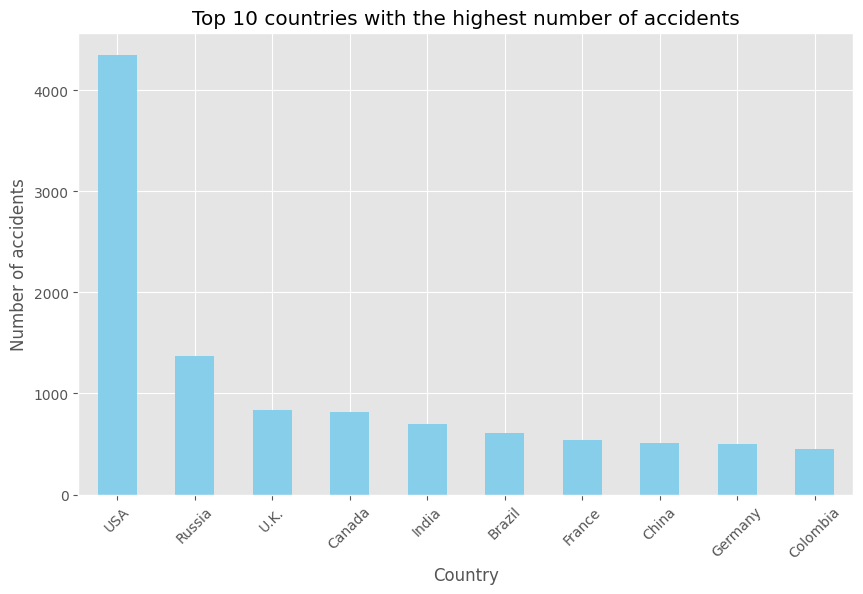

In [33]:
accidents_country = accidents["country"].value_counts().head(10)
plt.figure(figsize=(10, 6))
accidents_country.plot(kind='bar', color='skyblue')
plt.title('Top 10 countries with the highest number of accidents')
plt.xlabel('Country')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45)
plt.show()

### The day of the week in which the most accidents occur is Friday

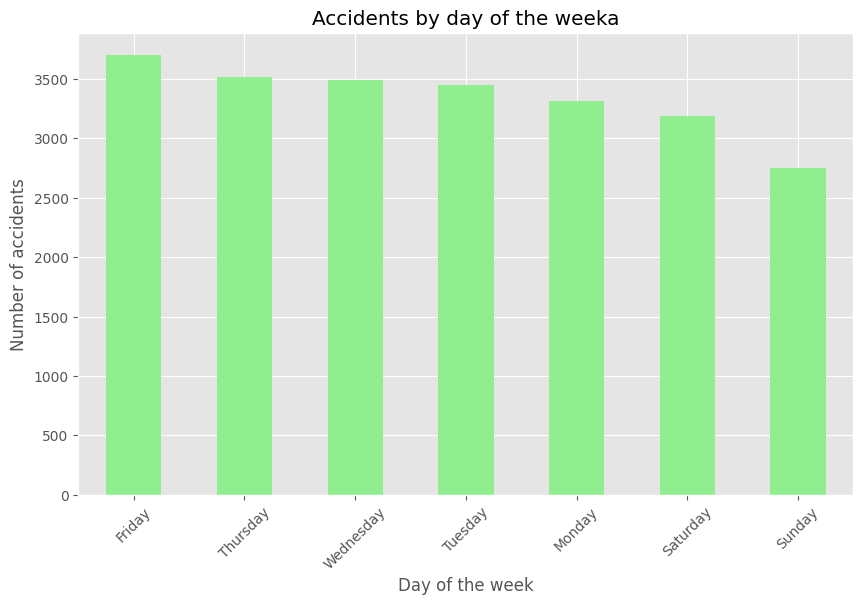

In [34]:
accidents["day_of_week"] = accidents["date"].dt.day_name()

accidents_by_day = accidents["day_of_week"].value_counts()

plt.figure(figsize=(10, 6))
accidents_by_day.plot(kind="bar", color="lightgreen")
plt.title("Accidents by day of the weeka")
plt.xlabel("Day of the week")
plt.ylabel("Number of accidents")
plt.style.use('ggplot')
plt.xticks(rotation=45)
plt.show()

### These are the safest operators, based on the number of accidents

In [35]:
safe_operators = accidents[["fatalities", "operator"]].groupby(["operator"]).sum()
safe_operators

,fatalities
operator,
", op.for GoJump",1.0
", op.for Tlaxcala State Government",2.0
", op.for UN",0.0
09 Charlie,0.0
1982-047 LLC,0.0
...,...
Ãgua Limpa Transportes,1.0
Ãngel LascurÃ¡in y Osio,2.0
Ãrzteflugambulanz,0.0


In [36]:
pd.Series(accidents["operator"].unique()).sort_values()

,0
5589,", op.for GoJump"
4539,", op.for Tlaxcala State Government"
3152,", op.for UN"
1846,09 Charlie
5889,1982-047 LLC
...,...
752,Ãngel LascurÃ¡in y Osio
3568,Ãrzteflugambulanz
2016,Ãtablissements Economique du Casino
91,ÃLAG


### The vehicle that caused the most deaths is Douglas C-47A (DC-3)

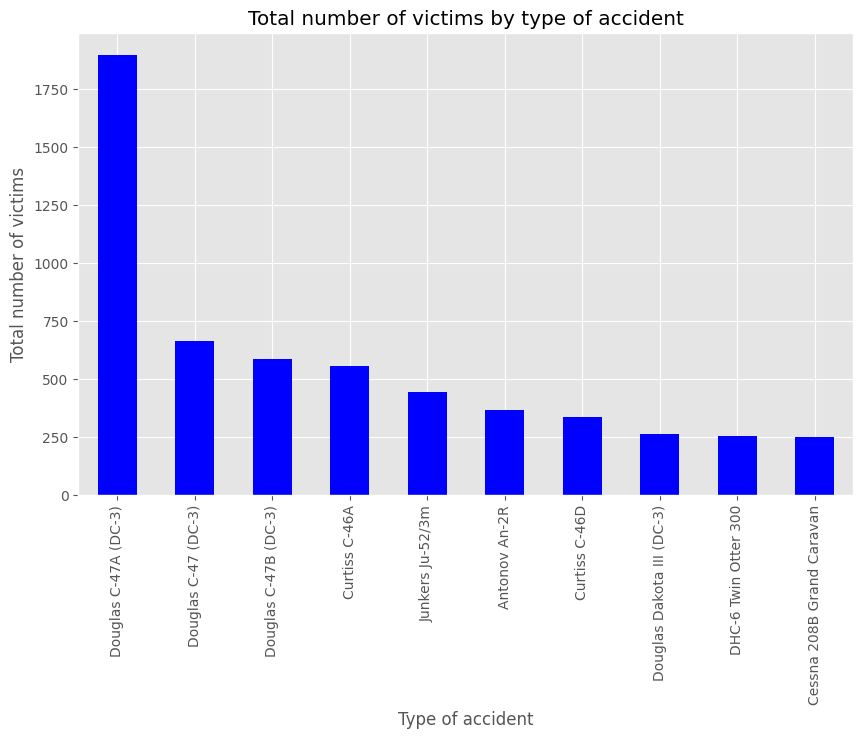

In [37]:
total_victims_by_type = accidents ["type"].value_counts().head(10)
plt.figure(figsize=(10, 6))
total_victims_by_type.plot(kind='bar', color='blue')

plt.title('Total number of victims by type of accident')
plt.xlabel('Type of accident')
plt.ylabel('Total number of victims')
plt.show()

### After September 11th the number of accidents decreased, but we can see that the period in which there were more accidents was 1940-1945, due to the world conflict.

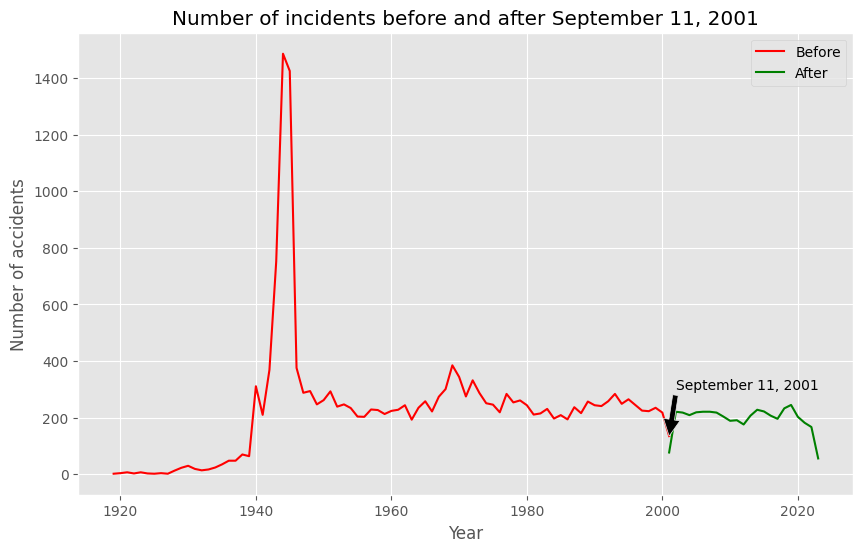

In [38]:
accidents_before_11_september = accidents[accidents['date'] < '2001-09-11']
accidents_after_11_september = accidents[accidents['date'] >= '2001-09-11']

accidents_first_by_year = accidents_before_11_september.groupby(accidents_before_11_september['date'].dt.year).size()
accidents_after_by_year = accidents_after_11_september.groupby(accidents_after_11_september['date'].dt.year).size()

plt.figure(figsize=(10, 6))

plt.plot(accidents_first_by_year.index, accidents_first_by_year.values, color='red', label="Before")
plt.plot(accidents_after_by_year.index, accidents_after_by_year.values, color='green', label="After")

plt.title("Number of incidents before and after September 11, 2001")
plt.xlabel("Year")
plt.ylabel("Number of accidents")

plt.legend()
plt.grid(True)

plt.annotate('September 11, 2001', xy=(2001, accidents_first_by_year.loc[2001]), xytext=(2002, 300),
             arrowprops=dict(facecolor='black'))

plt.show()

### Number of accidents by country

In [39]:
import plotly.express as px

accidents_by_country = accidents['country'].value_counts().reset_index()
accidents_by_country.columns = ['country', 'accidents']

fig = px.choropleth(accidents_by_country,
                    locations='country',
                    locationmode='country names',
                    color='accidents',
                    hover_name='country',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Number of accidents by country')
fig.show()

In conclusion, the analysis of aviation disasters from 1919 to 2023 allowed us to obtain a detailed overview of aviation safety. By identifying the country where the most accidents occur, the temporal trends and the
Safer and non-safer airline operators.